In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
import zipfile
import io
import pandas as pd

def load_file(file_path, file_name, date_col=None):
    # Open the zip file
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        # Check if the CSV file is present in the zip file
        if file_name in zip_ref.namelist():
            # Read the CSV content into a pandas DataFrame
            with zip_ref.open(file_name) as csv_file:
                df = pd.read_csv(io.TextIOWrapper(csv_file, 'utf-8'), parse_dates=[date_col], index_col=date_col)
                csv_file.close()
    return df


In [19]:
listings = pd.read_csv(path_data+'listings.csv')
listings.head()

,Stock Symbol,Exchange,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,XXII,amex,"22nd Century Group, Inc",1.3300,120.628490,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,FAX,amex,Aberdeen Asia-Pacific Income Fund Inc,5.0000,1266.332595,1986.0,NaN,NaN
2,IAF,amex,Aberdeen Australia Equity Fund Inc,6.1500,139.865305,NaN,NaN,NaN
3,CH,amex,"Aberdeen Chile Fund, Inc.",7.2201,67.563458,NaN,NaN,NaN
4,ABE,amex,Aberdeen Emerging Markets Smaller Company Oppo...,13.3600,128.842972,NaN,NaN,NaN


In [20]:
# exercise 01

"""
Explore and clean company listing information

To get started with the construction of a market-value based index, you'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, you will calculate market-cap weights for these stocks.

We have already imported pandas as pd, and loaded the listings data set with listings information from the NYSE, NASDAQ, and AMEX. The column 'Market Capitalization' is already measured in USD mn.
"""

# Instructions

"""

    
    Inspect listings using .info().
    
    Move the column 'Stock Symbol' into the index (inplace).
    
    Drop all companies with missing 'Sector' information from listings.
    
    Select companies with IPO Year before 2019.
    
    Inspect the result of the changes you just made using .info().
    
    Show the number of companies per 'Sector' using .groupby() and .size(). Sort the output in descending order.

"""

# solution

# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index("Stock Symbol", inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))


#----------------------------------#

# Conclusion

"""
Fantastic work! Your data is squeaky clean now!
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Exchange               6674 non-null   object 
 2   Company Name           6674 non-null   object 
 3   Last Sale              6590 non-null   float64
 4   Market Capitalization  6674 non-null   float64
 5   IPO Year               2852 non-null   float64
 6   Sector                 5182 non-null   object 
 7   Industry               5182 non-null   object 
dtypes: float64(3), object(5)
memory usage: 417.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               2349 non-null   object 
 1   Company Name           2349 non-null   object 
 2   

'\nFantastic work! Your data is squeaky clean now!\n'

In [21]:
# exercise 02

"""
Select and inspect index components

Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.
"""

# Instructions

"""
We have already imported pandas as pd, and loaded the listings data with the modifications you made during the last exercise.

    
    Use .groupby() and .nlargest() to select the largest company by 'Market Capitalization' for each 'Sector', and assign the result to components.
    
    Print components, sorted in descending order by market cap.
    
    Select Stock Symbol from the index of components, assign it to tickers and print the result.
    
    Create a list info_cols that holds the column names Company Name, Market Capitalization, and Last Sale. Next, use .loc[] with tickers and info_cols to print() more details about the listings sorted in descending order by Market Capitalization).

"""

# solution

# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ["Company Name", "Market Capitalization", "Last Sale"]
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

#----------------------------------#

# Conclusion

"""
Great job! You're ready for the next step in creating this index.
"""

Sector                 Stock Symbol
Technology             AAPL            740024.467000
Consumer Services      AMZN            422138.530626
Miscellaneous          BABA            275525.000000
Health Care            AMGN            118927.210535
Transportation         UPS              90180.886756
Finance                GS               88840.590477
Consumer Non-Durables  ABEV             88240.198455
Basic Industries       RIO              70431.476895
Public Utilities       TEF              54609.806092
Capital Goods          GM               50086.335099
Energy                 PAA              22223.001416
Consumer Durables      CPRT             13620.922869
Name: Market Capitalization, dtype: float64
Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                   

"\nGreat job! You're ready for the next step in creating this index.\n"

Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


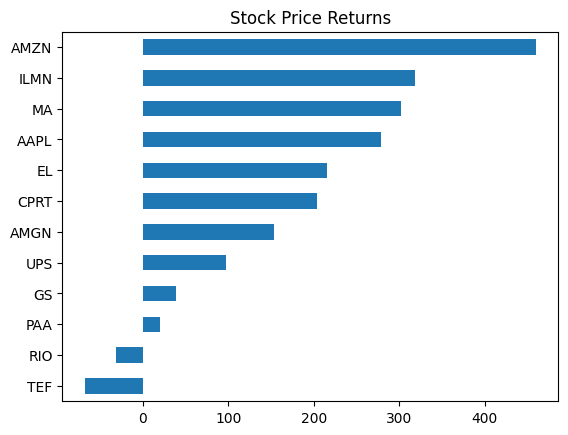

'\nAwesome! See you in the next video!\n'

In [24]:
# exercise 03

"""
Import index component price information

Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt for you. We have also made the variable tickers available to you, which contains the Stock Symbol for each index component as a list.

    
    Print tickers to verify the content matches your result from the last exercise.
    
    Use pd.read_csv() to import 'stock_prices.csv', parsing the 'Date' column and also setting the 'Date' column as index before assigning the result to stock_prices. Inspect the result using .info().
    
    Calculate the price return for the index components by dividing the last row of stock_prices by the first, subtracting 1 and multiplying by 100. Assign the result to price_return.
    
    Plot a horizontal bar chart of the sorted returns with the title Stock Price Returns.

"""

# solution
import matplotlib.pyplot as plt
# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = load_file(path_data+'stock_data.zip', 'stock_data.csv', 'Date')
print(stock_prices.info())

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(title="Stock Price Returns", kind='barh')
plt.show()


#----------------------------------#

# Conclusion

"""
Awesome! See you in the next video!
"""

In [25]:
# exercise 04

"""
Calculate number of shares outstanding

The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.
"""

# Instructions

"""
Calculate number of shares outstanding

The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.
"""

# solution

# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers, ["Market Capitalization","Last Sale"]]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components["Market Capitalization"].div(components["Last Sale"])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))


#----------------------------------#

# Conclusion

"""
Great work! Now you know which companies have the most shares.
"""

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               2349 non-null   object 
 1   Company Name           2349 non-null   object 
 2   Last Sale              2349 non-null   float64
 3   Market Capitalization  2349 non-null   float64
 4   IPO Year               2349 non-null   float64
 5   Sector                 2349 non-null   object 
 6   Industry               2349 non-null   object 
dtypes: float64(3), object(4)
memory usage: 211.4+ KB
None
Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                    70431.476895      38.94
GM                     50086.335099      33.39
CPRT                   13620.922869  

'\nGreat work! Now you know which companies have the most shares.\n'

In [29]:
components['Number of Shares'] = no_shares

Stock Symbol
GS        397.817439
CPRT      459.390316
AMZN      477.170618
PAA       723.404994
AMGN      735.890171
UPS       869.297154
GM       1500.039985
RIO      1808.717948
BABA     2500.000000
TEF      5037.804990
AAPL     5246.540000
ABEV    15701.102928
Name: Number of Shares, dtype: float64


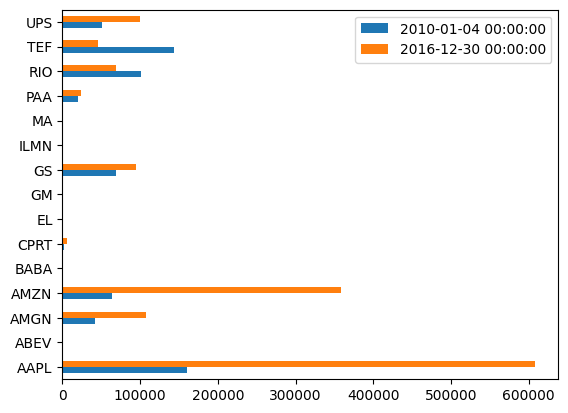

"\nFantastic job! You've made one of the essential ingredients of the index.\n"

In [30]:
# exercise 05

"""
Create time series of market value

You can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt for you. We have also created the variables components and stock_prices that you worked with in the last exercises.

    
    Select the 'Number of Shares' from components, assign to no_shares, and print the result, sorted in the default (ascending) order.
    
    Multiply stock_prices by no_shares to create a time series of market cap per ticker, and assign it to market_cap.
    
    Select the first and the last row of market_cap and assign these to first_value and last_value.
    
    Use pd.concat() to concatenate first_value and last_value along axis=1 and plot the result as horizontal bar chart.

"""

# solution

# Select the number of shares
no_shares = components['Number of Shares']
print(no_shares.sort_values())

# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]


# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()



#----------------------------------#

# Conclusion

"""
Fantastic job! You've made one of the essential ingredients of the index.
"""

Date
2010-01-04    6.529794e+05
2010-01-05    6.562973e+05
2010-01-06    6.527435e+05
2010-01-07    6.492939e+05
2010-01-08    6.537965e+05
                  ...     
2016-12-23    1.425208e+06
2016-12-27    1.435541e+06
2016-12-28    1.431656e+06
2016-12-29    1.427209e+06
2016-12-30    1.413611e+06
Length: 1762, dtype: float64
Date
2010-01-04    100.000000
2010-01-05    100.508119
2010-01-06     99.963872
2010-01-07     99.435588
2010-01-08    100.125141
                 ...    
2016-12-23    218.262332
2016-12-27    219.844835
2016-12-28    219.249834
2016-12-29    218.568789
2016-12-30    216.486276
Length: 1762, dtype: float64


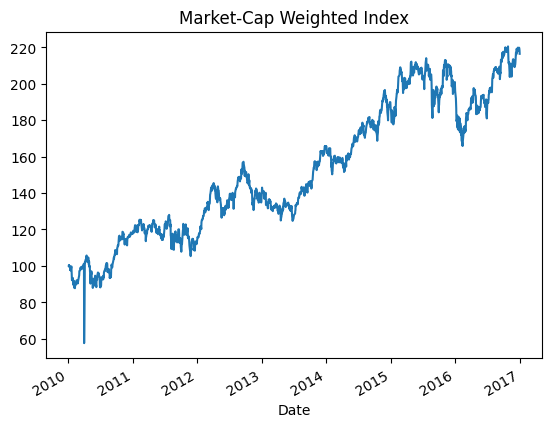

'\nAwesome! Now you have an index to work with!\n'

In [33]:
# exercise 06

"""
Calculate & plot the composite index

By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.

Use the time series of market capitalization that you created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt for you. We have also loaded components and market_cap_series, which you worked with in the last exercise.

    
    Aggregate the market cap per trading day by applying .sum() to market_cap_series with axis=1, assign to raw_index and print the result.
    
    Normalize the aggregate market cap by dividing by the first value of raw_index and multiplying by 100. Assign this to index and print the result.
    
    Plot the index with the title 'Market-Cap Weighted Index'.

"""

# solution

# Aggregate and print the market cap per trading day
raw_index = market_cap.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()

#----------------------------------#

# Conclusion

"""
Awesome! Now you have an index to work with!
"""

116.48627582170694
Stock Symbol
CPRT    0.006694
PAA     0.010921
GM      0.024614
TEF     0.026837
RIO     0.034613
ABEV    0.043365
GS      0.043660
UPS     0.044318
AMGN    0.058445
BABA    0.135403
AMZN    0.207455
AAPL    0.363675
Name: Market Capitalization, dtype: float64


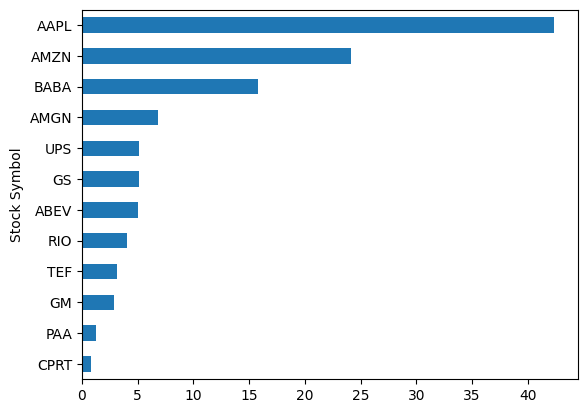

'\nFantastic job! The next step is to take a look at how your index stacks up against a benchmark!\n'

In [35]:
# exercise 07

"""
Calculate the contribution of each stock to the index

You have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.

Let's also determine how much each stock has contributed to the index return.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt for you. We have also loaded components and the index you worked with in the last exercise.

    
    Divide the last index value by the first, subtract 1 and multiply by 100. Assign the result to index_return and print it.
    
    Select the 'Market Capitalization' column from components.
    
    Calculate the total market cap for all components and assign this to total_market_cap.
    
    Divide the components' market cap by total_market_cap to calculate the component weights, assign it to weights, and print weights with the values sorted in default (ascending) order.
    
    Multiply weights by the index_return to calculate the contribution by component, sort the values in ascending order, and plot the result as a horizontal bar chart.

"""

# solution

# Calculate and print the index return here
index_return = (index.iloc[-1] / index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()


#----------------------------------#

# Conclusion

"""
Fantastic job! The next step is to take a look at how your index stacks up against a benchmark!
"""

In [38]:
djia = load_file(path_data+'stock_data.zip', 'djia.csv', "date")

Index    116.486276
DJIA      86.722172
dtype: float64


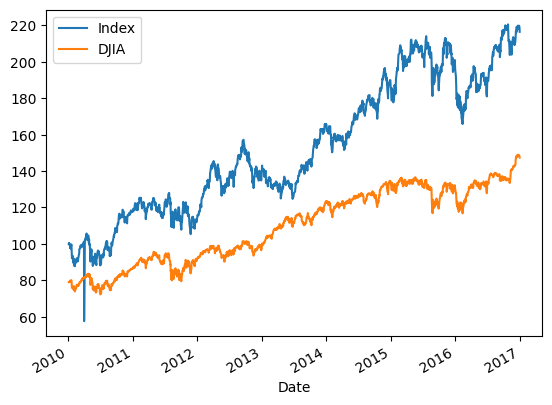

'\nAwesome! How do they compare?\n'

In [39]:
# exercise 08

"""
Compare index performance against benchmark I

The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we used the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.
"""

# Instructions

"""
We have already imported pandas as pd, matplotlib.pyplot as plt for you. We have also loaded your index and the DJIA data into variables index and djia, respectively, both as a pd.Series().

    
    Convert index to a pd.DataFrame with the column name 'Index' and assign the result to data.
    
    Normalize djia to start at 100 and add it as new column to data.
    
    Show the total return for both index and djia by dividing the last row of data by the first, subtracting 1 and multiplying by 100.
    
    Show a plot of both of the series in data.

"""

# solution

# Convert index series to dataframe here
data = index.to_frame(name="Index")

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print(data.iloc[-1].div(data.iloc[0]).sub(1).mul(100))

# Plot both series
data.plot()
plt.show()

#----------------------------------#

# Conclusion

"""
Awesome! How do they compare?
"""

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1762 non-null   float64
 1   DJIA    1762 non-null   float64
dtypes: float64(2)
memory usage: 41.3 KB
None
                 Index       DJIA
Date                             
2010-01-04  100.000000  78.933999
2010-01-05  100.508119  78.844952
2010-01-06   99.963872  78.857332
2010-01-07   99.435588  79.104785
2010-01-08  100.125141  79.189283


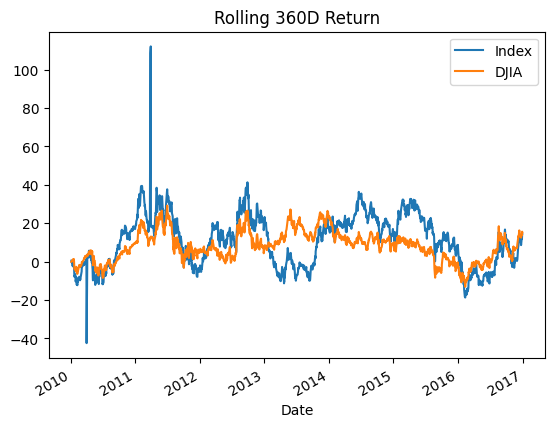

'\nGreat job! How do the returns of your index compare to the Dow Jones?\n'

In [42]:
# exercise 09

"""
Compare index performance against benchmark II

The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we have use the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.
"""

# Instructions

"""
We have already imported numpy as np, pandas as pd, matplotlib.pyplot as plt for you. We have also loaded your Index and the Dow Jones Industrial Average (normalized) in a variable called data.

    
    Inspect data and print the first five rows.
    
    Define a function multi_period_return that takes a numpy array of period returns as input, and returns the total return for the period. Use the formula from the video - add 1 to the input, pass the result to np.prod(), subtract 1 and multiply by 100.
    
    Create a .rolling() window of length '360D' from data, and apply multi_period_return. Assign to rolling_return_360.
    
    Plot rolling_return_360 using the title 'Rolling 360D Return'.

"""

# solution
import numpy as np
# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r+1)-1)*100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()


#----------------------------------#

# Conclusion

"""
Great job! How do the returns of your index compare to the Dow Jones?
"""

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726 

/tmp/ipykernel_123629/3119579704.py:35: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stock_prices.pct_change()


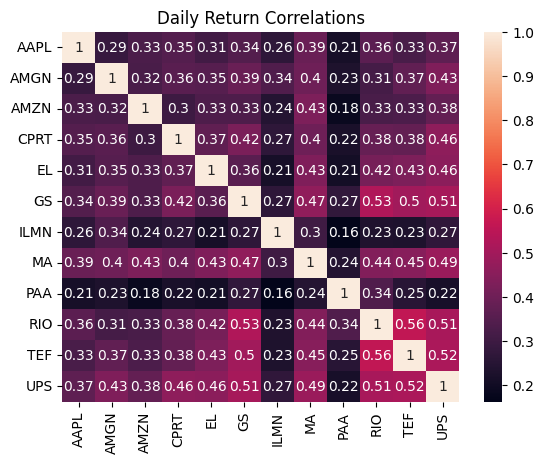

'\nGreat visualizing!\n'

In [43]:
# exercise 10

"""
Visualize your index constituent correlations

To better understand the characteristics of your index constituents, you can calculate the return correlations.

Use the daily stock prices or your index companies, and show a heatmap of the daily return correlations!
"""

# Instructions

"""
We have already imported pandas as pd, matplotlib.pyplot as plt, and seaborn as sns. We have also loaded the historical price series of your index constituents into the variable stock_prices.

    
    Inspect stock_prices using .info().
    
    Calculate the daily returns for stock_prices and assign the result to returns.
    
    Calculate the pairwise correlations for returns, assign them to correlations and print the result.
    
    Plot a seaborn annotated heatmap of the daily return correlations with the title 'Daily Return Correlations'.

"""

# solution

import seaborn as sns

# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title("Daily Return Correlations")
plt.show()


#----------------------------------#

# Conclusion

"""
Great visualizing!
"""

In [46]:
# exercise 11

"""
Save your analysis to multiple excel worksheets

Now that you have completed your analysis, you may want to save all results into a single Excel workbook.

Let's practice exporting various DataFrame to multiple Excel worksheets.
"""

# Instructions

"""
We have already imported pandas as pd for you. We have also loaded both the historical price series of your index constituents into the variable stock_prices, and the index as index.

    
    Inspect both index and stock_prices using .info().
    
    Use .join() to combine index with stock_prices, and assign to data.
    
    Apply .pct_change() to data and assign to returns.
    
    Create pd.ExcelWriter and use with to export data and returns to excel with sheet_names of the same name.

"""

# solution

# Inspect index and stock_prices
index.rename("Index", inplace=True)
print(index.info())
print(stock_prices.info())

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

# Export data and data as returns to excel
with pd.ExcelWriter(path_data+'data.xlsx') as writer:
    data.to_excel(excel_writer=writer, sheet_name='data')
    returns.to_excel(excel_writer=writer, sheet_name='returns')


#----------------------------------#

# Conclusion

"""
Awesome job! Now you can share your analysis with other people who use Excel!
"""

<class 'pandas.core.series.Series'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Series name: Index
Non-Null Count  Dtype  
--------------  -----  
1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2

/tmp/ipykernel_123629/3242949826.py:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change()


'\nAwesome job! Now you can share your analysis with other people who use Excel!\n'